In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from ipywidgets import interact, IntSlider, FloatSlider
import importlib.metadata

In [2]:
def generate_data(n_samples=50, noise=0.1):
    np.random.seed(42)
    X = np.sort(10 * np.random.rand(n_samples, 1), axis=0)
    y = 2 * X + 1 + noise * np.random.randn(n_samples, 1)  # y = 2x + 1 + noise
    return X, y

def plot_regression(n_samples=50, noise=0.1):
    X, y = generate_data(n_samples, noise)
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Linear Regression with {n_samples} Samples and Noise={noise}")
    plt.legend()
    plt.show()

interact(plot_regression, 
         n_samples=IntSlider(min=10, max=200, step=10, value=50, description='Samples'),
         noise=FloatSlider(min=0.0, max=2.0, step=0.1, value=0.1, description='Noise'))

interactive(children=(IntSlider(value=50, description='Samples', max=200, min=10, step=10), FloatSlider(value=…

<function __main__.plot_regression(n_samples=50, noise=0.1)>

In [3]:
def list_requirements():
    libraries = ["numpy", "matplotlib", "scikit-learn", "ipywidgets"]
    for lib in libraries:
        version = importlib.metadata.version(lib)
        print(f"{lib}=={version}")

list_requirements()

numpy==1.26.2
matplotlib==3.8.2
scikit-learn==1.3.2
ipywidgets==8.1.5


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from ipywidgets import interact, IntSlider, FloatSlider
import importlib.metadata

def generate_data(n_samples=50, degree=2, noise=0.1):
    np.random.seed(42)
    X = np.sort(10 * np.random.rand(n_samples, 1), axis=0)
    y = sum([(i + 1) * X**i for i in range(degree)]) + np.random.normal(0, noise, size=(n_samples, 1))
    return X, y

def plot_polynomial_regression(n_samples=50, degree=2, noise=0.1):
    X, y = generate_data(n_samples, degree, noise)
    
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X, y_pred, color='red', linewidth=2, label=f'Polynomial Regression (Degree {degree})')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Polynomial Regression with {n_samples} Samples, Degree {degree}, Noise {noise}")
    plt.legend()
    plt.show()

interact(plot_polynomial_regression, 
         n_samples=IntSlider(min=10, max=200, step=10, value=50, description='Samples'),
         degree=IntSlider(min=1, max=10, step=1, value=2, description='Degree'),
         noise=FloatSlider(min=0.0, max=2.0, step=0.1, value=0.1, description='Noise'))

def list_requirements():
    libraries = ["numpy", "matplotlib", "scikit-learn", "ipywidgets"]
    for lib in libraries:
        version = importlib.metadata.version(lib)
        print(f"{lib}=={version}")

list_requirements()


interactive(children=(IntSlider(value=50, description='Samples', max=200, min=10, step=10), IntSlider(value=2,…

numpy==1.26.2
matplotlib==3.8.2
scikit-learn==1.3.2
ipywidgets==8.1.5


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider

class MyLinRegression:
    def __init__(self, degree, n_samples, noise):
        self.degree = degree
        self.n_samples = n_samples
        self.noise = noise
        self.x_train, self.y_train = self.generate_data()
        self.x_pred = np.linspace(min(self.x_train), max(self.x_train), 100)
        self.beta = np.zeros(degree + 1)
        self.X = np.zeros((len(self.x_train), degree + 1))
        self.M = np.zeros((degree + 1, degree + 1))

    def generate_data(self):
        np.random.seed(42)
        x_train = np.sort(10 * np.random.rand(self.n_samples))
        y_train = sum([(i + 1) * x_train**i for i in range(self.degree)])
        y_train += np.random.normal(0, self.noise, size=len(x_train))
        return x_train, y_train

    def assemble_data_matrix(self):
        for i in range(len(self.x_train)):
            for j in range(self.degree + 1):
                self.X[i, j] = self.x_train[i]**j

    def compute_moment_matrix(self):
        self.M = np.matmul(self.X.T, self.X)

    def solve(self):
        XT_y = np.dot(self.y_train, self.X)
        self.beta = np.matmul(np.linalg.pinv(self.M), XT_y)

    def polynomial_ansatz(self, x_i):
        y_ansatz = sum(self.beta[j] * x_i**j for j in range(self.degree + 1))
        return y_ansatz

    def plot_data_and_curve(self):
        self.assemble_data_matrix()
        self.compute_moment_matrix()
        self.solve()
        y_pred = self.polynomial_ansatz(self.x_pred)
        
        plt.figure(figsize=(8, 5))
        plt.scatter(self.x_train, self.y_train, color='blue', label='Data Points')
        plt.plot(self.x_pred, y_pred, color='red', linewidth=2, label=f'Polynomial Regression (Degree {self.degree})')
        plt.xlabel("X")
        plt.ylabel("y")
        plt.title(f"Polynomial Regression with {self.n_samples} Samples, Degree {self.degree}, Noise {self.noise}")
        plt.legend()
        plt.show()

def interactive_regression(degree=2, n_samples=50, noise=0.1):
    model = MyLinRegression(degree, n_samples, noise)
    model.plot_data_and_curve()

interact(interactive_regression, 
         degree=IntSlider(min=1, max=10, step=1, value=2, description='Degree'),
         n_samples=IntSlider(min=10, max=200, step=10, value=50, description='Samples'),
         noise=FloatSlider(min=0.0, max=2.0, step=0.1, value=0.1, description='Noise'))


interactive(children=(IntSlider(value=2, description='Degree', max=10, min=1), IntSlider(value=50, description…

<function __main__.interactive_regression(degree=2, n_samples=50, noise=0.1)>

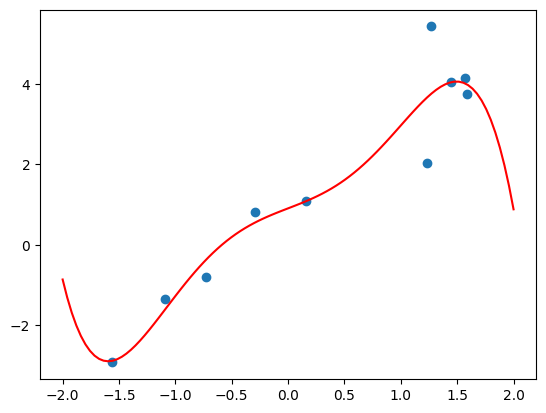

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
degree_poly = 1
noise = 1
n_samples = 10
X = 4 * np.random.rand(n_samples,1) - 2   #x timmeline increased instead of just 0 to 1 values, we get -2,2
#print(X)
#y = np.random.rand(n_samples)
#X = np.random.rand(n_samples, 1)
y = sum((i + 1) * X**i for i in range(degree_poly + 1)) + noise * np.random.randn(n_samples,1)
#y = 4 + 2 * X + 5 * X**2 + 6 * X**3 + 8*np.random.randn(100,1)

poly_features = PolynomialFeatures(degree = 5, include_bias= False)  #polynomial ansatz
X_poly = poly_features.fit_transform(X)

reg = LinearRegression()
reg.fit(X_poly,y)

X_vals = np.linspace(-2,2,100).reshape(-1,1)
X_vals_poly = poly_features.transform(X_vals)

y_vals = reg.predict(X_vals_poly)


plt.scatter(X,y)
plt.plot(X_vals, y_vals, color = "r")
plt.show()

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
def generate_data(n_samples=50, degree_poly= 1, noise=0.1):
    np.random.seed(42)
    X = 4 * np.random.rand(n_samples,1) - 2
    y = sum([(i + 1) * X**i for i in range(degree_poly + 1)]) + noise * np.random.randn(n_samples,1)
    return X, y

def plot_polynomial_regression(n_samples=50, degree_poly = 2, degree=2, noise=0.1):
    X, y = generate_data(n_samples, degree_poly, noise)
    poly_features = PolynomialFeatures(degree, include_bias = False)
    X_poly = poly_features.fit_transform(X)
    reg = LinearRegression()
    reg.fit(X_poly, y)

    X_vals = np.linspace(-2,2,100).reshape(-1,1)
    X_vals_poly = poly_features.transform(X_vals)
    y_vals = reg.predict(X_vals_poly)

    
    #model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    #model.fit(X, y)
    #y_pred = model.predict(X)
    
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X_vals, y_vals, color='red', linewidth=2, label=f'Polynomial Regression (Degree {degree})')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Polynomial Regression with {n_samples} Samples, Degree {degree}, Noise {noise}")
    plt.legend()
    plt.show()
def list_requirements():
    libraries = ["numpy", "matplotlib", "scikit-learn", "ipywidgets"]
    for lib in libraries:
        version = importlib.metadata.version(lib)
        print(f"{lib}=={version}")

list_requirements()

    
interact(plot_polynomial_regression, 
         n_samples=IntSlider(min=10, max=200, step=10, value=50, description='Samples'),
         degree=IntSlider(min=1, max=10, step=1, value=2, description='Degree'),
         noise=FloatSlider(min=0.0, max=10.0, step=0.3, value=0.3, description='Noise'),
         degree_poly = IntSlider(min= 1, max = 10, step = 1, value =1 , description = 'Degree of Polynomial')
         )

numpy==1.26.2
matplotlib==3.8.2
scikit-learn==1.3.2
ipywidgets==8.1.5


interactive(children=(IntSlider(value=50, description='Samples', max=200, min=10, step=10), IntSlider(value=1,…

<function __main__.plot_polynomial_regression(n_samples=50, degree_poly=2, degree=2, noise=0.1)>